# BigMart Sales Prediction  On Train_Dataset .

### 1) Problem Statement -->
- BigMart's data scientists have gathered sales data from 2013 for 1559 products across 10 stores located in various cities. Additionally, they have defined specific attributes for each product and store. The primary objective of this data science project is to construct a predictive model to determine the sales of each product at a given store.
##### Business Goal:
- The overarching goal for BigMart is to leverage the developed model to comprehend the product and store attributes that significantly influence sales growth.
##### Analysis:
- Type of problem: This project is framed as a Supervised Machine Learning (Linear Regression) Problem.
- Target feature: The target feature for prediction is Item_Outlet_Sales.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2) Hypothesis Generation -- > 

##### 2) Hypothesis Generation
- City Type: Stores located in urban cities should have higher sales because of the higher income levels of people there.

- Store Location: Store located in popular market place shoud have higher Sales

- Populted City: City with high population should have higher Sales.

- Store capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

- Branded Products: Branded Products will have higher Sales.

- Product Visbility: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

- Product Frequency: More frequnct products will have high Sales.


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3) Loading Packages and Data -- >

In [1]:
# Data Manipulation -->

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew  # skewnees

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read train_dataset -->

train_data = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Technocolabs\train.csv')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# First five rows of train_dataset -->
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# last five rows of train_dataset -->
train_data.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# Shape of train_dataset -->
train_data.shape

(8523, 12)

- There are 8523 rows and 12 columns which is exactly same we had it in excel.

In [6]:
# Lets check how many columns present in train_dataset -->

train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
# info() about tha train_dataset -->
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- info() --> Information about the data and the datatypes for each columns.

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4) Data Structure and Content -- >

### > Numerical Features:

##### Item_Weight:

- Description: The weight of the product or item.
- Representation: A numerical value indicating how heavy the product is.

##### Item_Visibility:

- Description: The percentage of the total display area in a store allocated to a specific product.
- Representation: A number representing the visibility percentage of the product on the shelves.

##### Item_MRP:

- Description: The Maximum Retail Price (list price) of the product.
- Representation: A numerical value representing the highest price at which the product is sold.

##### Outlet_Establishment_Year:

- Description: The year in which the store was established.
- Representation: A four-digit number indicating the establishment year of the store.


##### -------------------------------------------------------------------------------------------------------------------------------------



### > Categorical features:
- Item_Identifier : Unique product ID (we would want to drop this column later)
- Item_Fat_Content : Whether the product is low, fat or not
- Item_Type : The category to which the product belongs.
- Outlet_Identifier : Unique store ID
- Outlet_Size : The size of the store in terms of ground area covered.
- Outlet_Location_Type : The type of city in which the store is located.
- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket


In [8]:
# describe() -- train_dataset -->

train_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


- describe() --> This method help to see train_data spread for numerical values by default :- min, max, mean, percentiles , std ...

- The dataset comprises 8523 entries and 12 attributes. Null values are present in 'Item_Weight' and 'Outlet_Size'. 'Item_Identifier' and 'Outlet_Identifier' serve as identifiers and do not impact the prediction of 'Item_Outlet_Sales', the target variable. Categorical features include 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', and 'Outlet_Type'.

### 8).Missing Value Treatment

In [9]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

- Missing values are present in 'Item_Weight' and 'Outlet_Size' in train_data

In [10]:
train_data.Item_Weight.value_counts()
train_data.Item_Weight.fillna(train_data.Item_Weight.mean() , inplace=True)
train_data.Outlet_Size.value_counts()
train_data.Outlet_Size.fillna('Medium' , inplace=True)

- Fill missing numeric values with column mean, and non-numeric values with most frequent value.

In [11]:
train_data.isnull().sum()[train_data.isnull().sum() >0]

Series([], dtype: int64)

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 5) Exploratory Data Analysis (EDA) : -->

###  6) Univariate Analysis : -->

In [12]:
# Numerical columns -->
train_num = train_data.select_dtypes(include=['float' , 'int']).columns
train_num

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
# Convert Numerical columns in list form -->

train_num = list(train_num)
train_num

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

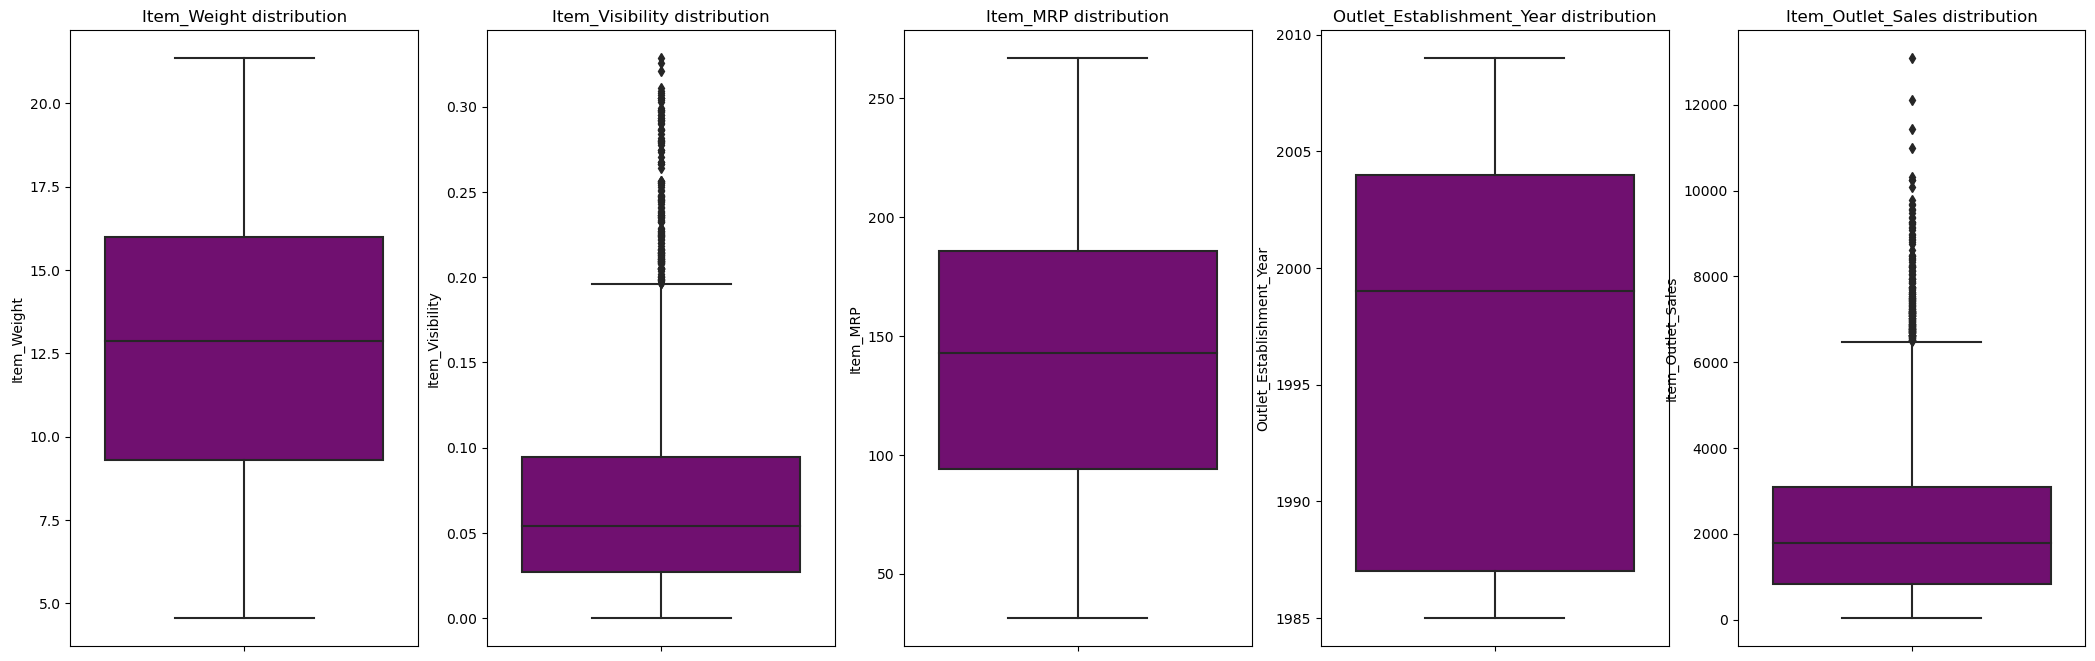

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(26, 8))

i = 0
while i < len(train_num):
    sns.boxplot(data=train_data, y=train_num[i], ax=ax[i], color='purple').set_title(f'{train_num[i]} distribution')
    i = i + 1

plt.show()


In [15]:
outlier_counts = {}

for feature in train_num:
    Q1 = train_data[feature].quantile(0.25)
    Q3 = train_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((train_data[feature] < lower_bound) | (train_data[feature] > upper_bound)).sum()

    outlier_counts[feature] = outliers_count

for feature, count in outlier_counts.items():
    print(f'Feature: {feature}, Number of Outliers: {count}')


Feature: Item_Weight, Number of Outliers: 0
Feature: Item_Visibility, Number of Outliers: 144
Feature: Item_MRP, Number of Outliers: 0
Feature: Outlet_Establishment_Year, Number of Outliers: 0
Feature: Item_Outlet_Sales, Number of Outliers: 186


##### Observations:

1. **Item Weight:** No outliers were detected, indicating a consistent distribution of item weights.

2. **Item Visibility:** There are 144 outliers in the item visibility data, suggesting variations in product visibility within the store.

3. **Item MRP:** No outliers were identified, indicating a stable pricing range for the majority of items.

4. **Outlet Establishment Year:** No outliers were found, suggesting uniformity in the establishment years of the outlets.

5. **Item Outlet Sales:** 186 outliers were detected in sales data, indicating potential variations in sales performance across items or outlets. Further investigation may be warranted to understand and address these anomalies.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

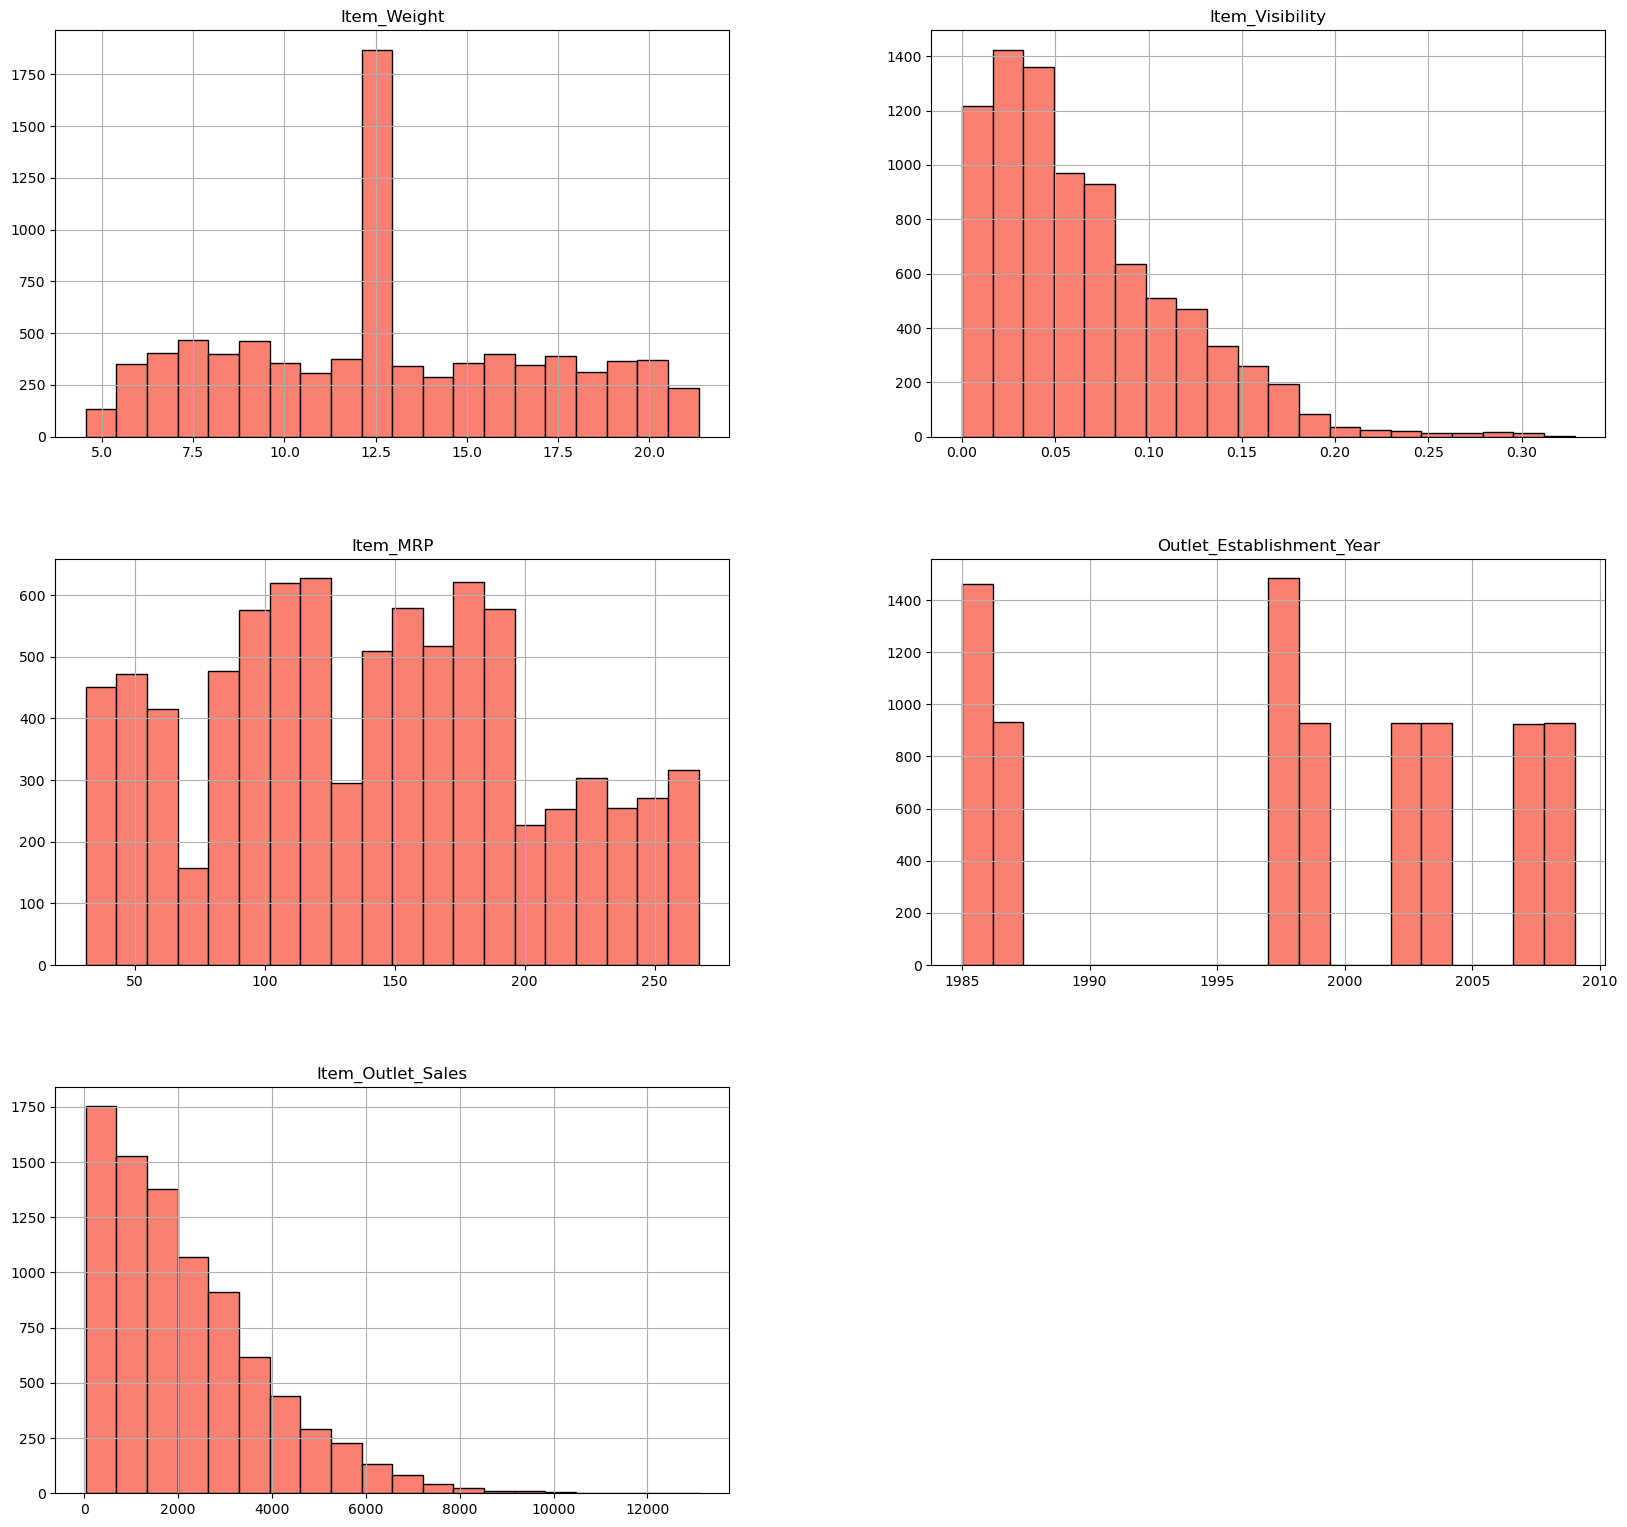

In [16]:
# histogram on Numerical columns --> 

train_data.hist(figsize=(20,19), color='salmon', edgecolor='black', bins = 20 )
plt.show()

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Skewness for Item_Weight: 0.09
Skewness for Item_Visibility: 1.17
Skewness for Item_MRP: 0.13
Skewness for Outlet_Establishment_Year: -0.40
Skewness for Item_Outlet_Sales: 1.18


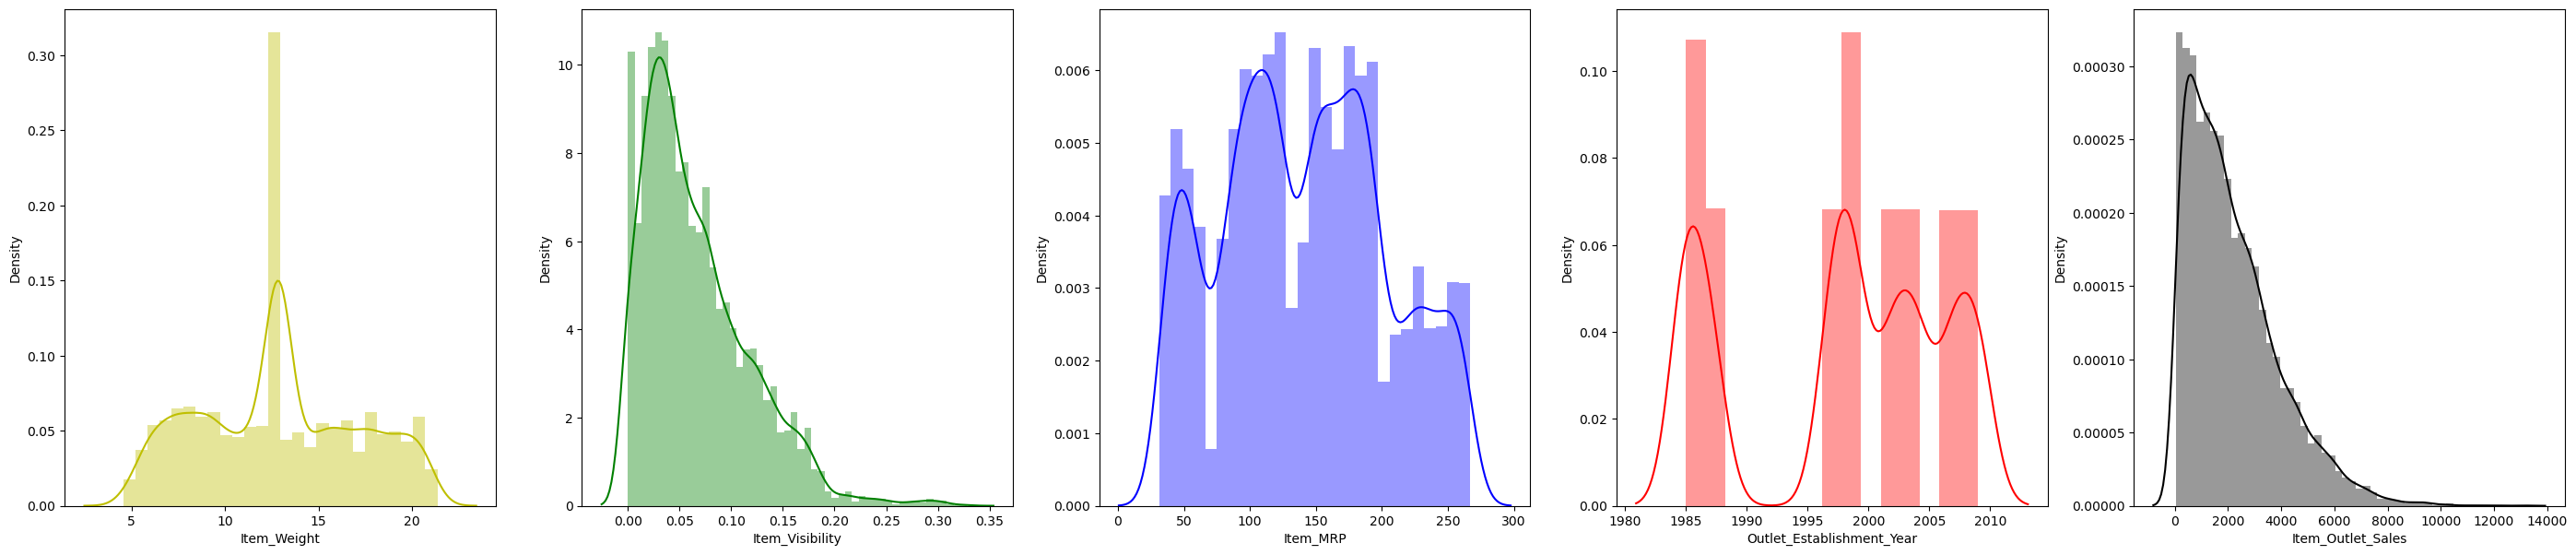

In [17]:
# distribution plot on Numeric column -->

fig, axs = plt.subplots(ncols=5,figsize=(35,7))
sns.distplot(train_data['Item_MRP'], ax =axs[2], color='b')
sns.distplot(train_data['Outlet_Establishment_Year'], ax =axs[3], color='r')
sns.distplot(train_data['Item_Outlet_Sales'], ax =axs[4], color='black')
sns.distplot(train_data['Item_Weight'], ax =axs[0], color='y')
sns.distplot(train_data['Item_Visibility'], ax =axs[1] , color='g')

# Calculate skewness separately and display -->

from scipy.stats import skew
skewness_values = {col: skew(train_data[col]) for col in train_num}  # train_num --> above created Numerical columns list.

for col, skewness in skewness_values.items():
    print(f'Skewness for {col}: {skewness:.2f}')

#####  Skewness measures the asymmetry of a distribution. -->

- **Item_Weight (Skewness: 0.09):** - The distribution is approximately symmetric.

- **Item_Visibility (Skewness: 1.17):** - The distribution is right-skewed, indicating a tail on the right side with a concentration of lower values.

- **Item_MRP (Skewness: 0.13):** -  The distribution is approximately symmetric.

- **Outlet_Establishment_Year (Skewness: -0.40):** - The distribution is slightly left-skewed, indicating a tail on the left side with a concentration of lower values.

- **Item_Outlet_Sales (Skewness: 1.18):** - The distribution is right-skewed, indicating a tail on the right side with a concentration of lower values.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<Axes: >

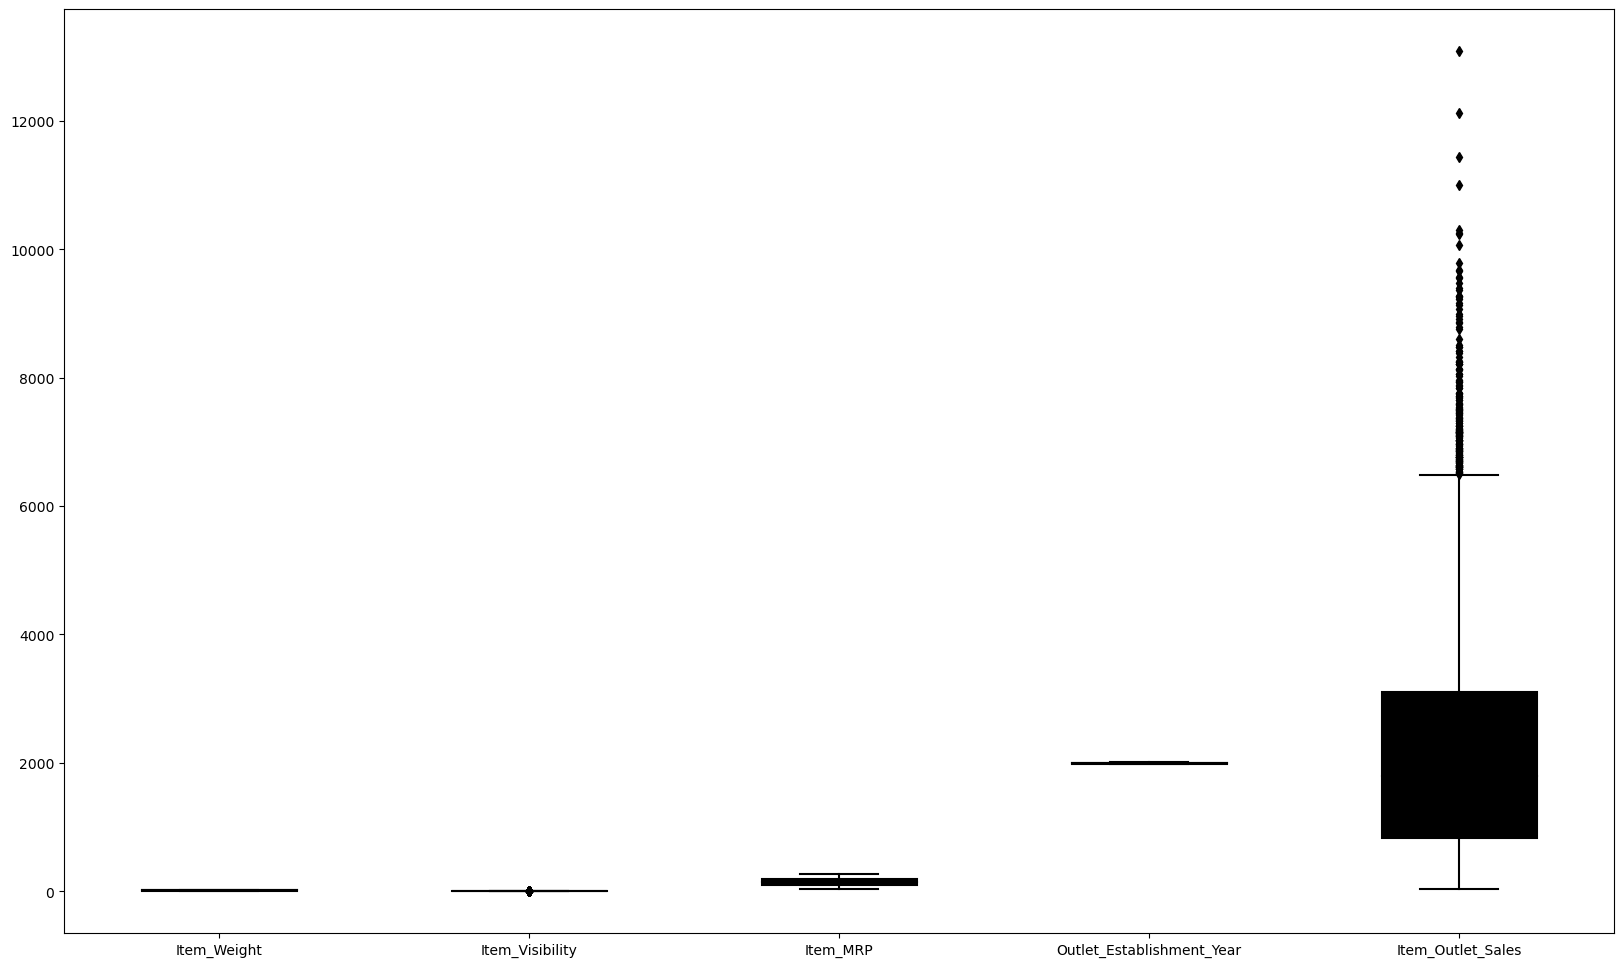

In [18]:
# boxplot -->
 
plt.figure(figsize=(20,12) )
sns.boxplot(data=train_data ,  color='black', width=0.5, boxprops=dict(edgecolor='black'))

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Outlate_type and there sales prediction.')

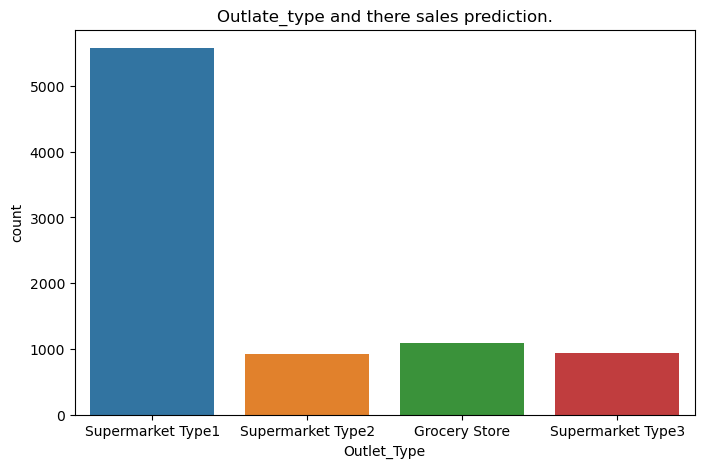

In [19]:
# countplot --> for find which Outlate_type have maximum sales -->

plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=train_data)
plt.title('Outlate_type and there sales prediction.')

- from above count plot I observed, Supermarket_Type1 have higer Outlet_Type than Grocery_Store , Supermarket_Type2 and Supermarket_Type3.

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
# Categorical columns -->

train_data.select_dtypes(include=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

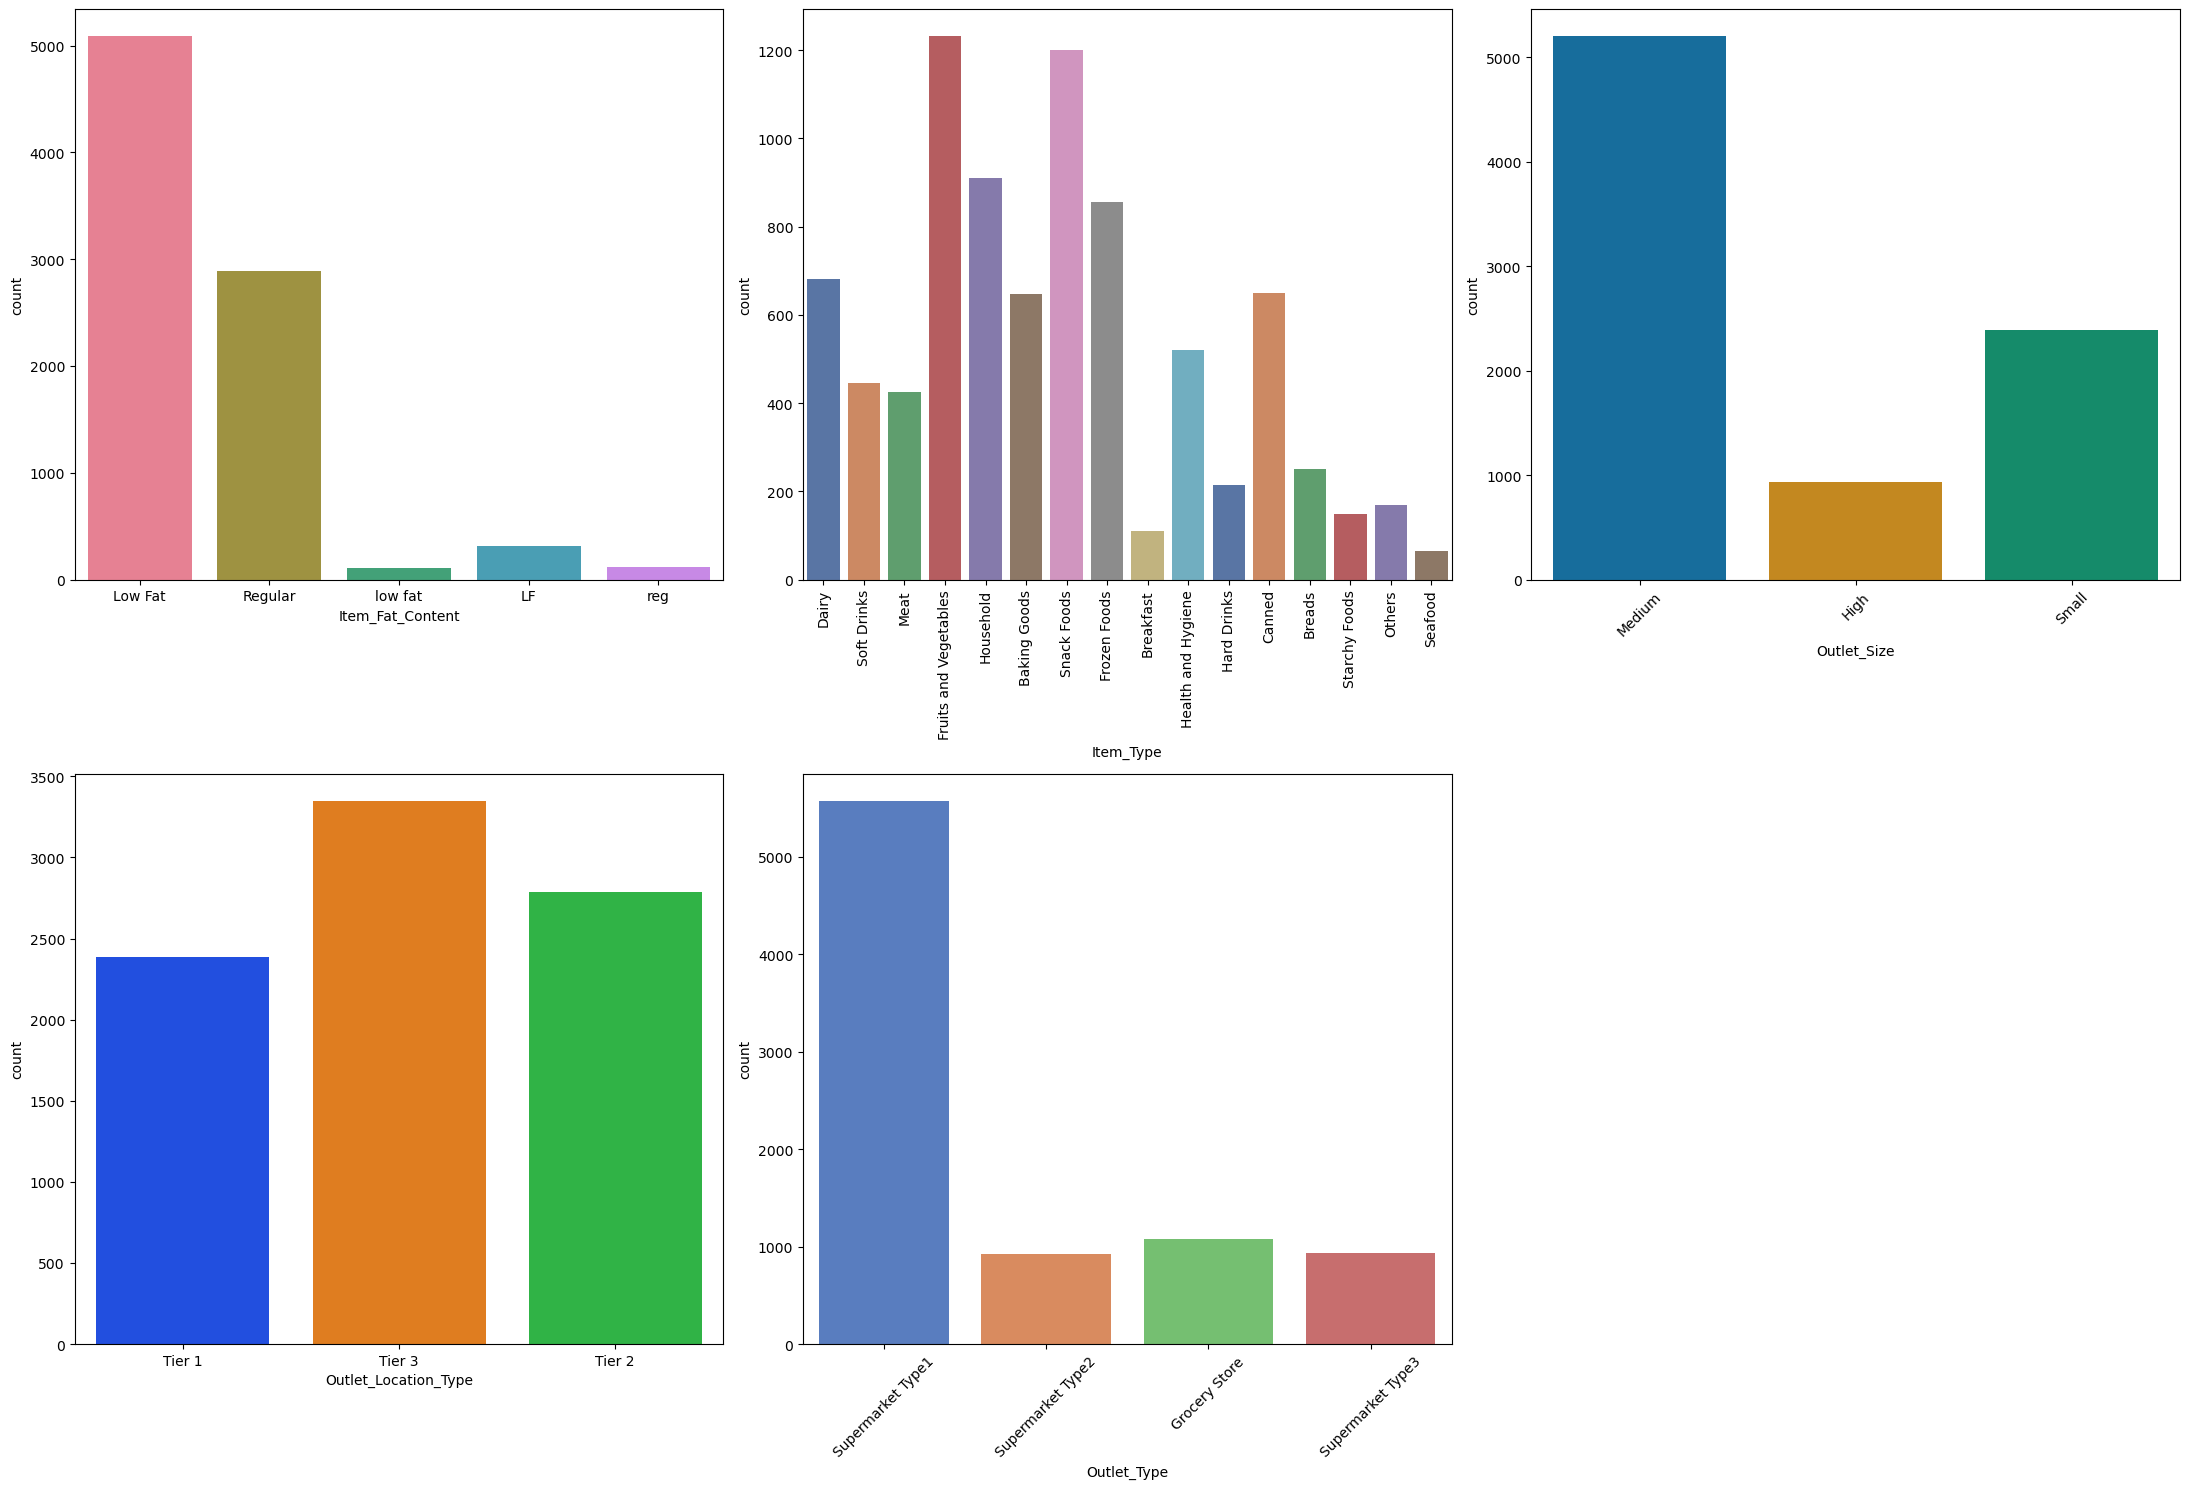

In [21]:
# Countplot for all Categorical column -->

fig, axs = plt.subplots(2, 3, figsize=(22, 15))


sns.countplot(x="Item_Type", data=train_data, palette='deep', ax=axs[0, 1])
axs[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(x="Outlet_Type", data=train_data, palette='muted', ax=axs[1, 1])
axs[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(x="Item_Fat_Content", data=train_data, palette='husl', ax=axs[0, 0])

sns.countplot(x="Outlet_Location_Type", data=train_data, palette='bright', ax=axs[1, 0])

sns.countplot(x="Outlet_Size", data=train_data, palette='colorblind', ax=axs[0, 2])

axs[0, 2].tick_params(axis='x', rotation=45)

# Remove the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()

- **Item_Fat_Content** - Customers predominantly choose Low Fat items, revealing a clear preference over Regular Fat options.

- **Item_Type** - Fruits and Vegetables emerge as popular choices, reflecting a strong inclination towards healthy eating or      cooking preferences among customers.

- **Outlet_Size** - Medium-sized outlets dominate the distribution, signaling a balanced approach in outlet size strategy.

- **Outlet_Location_Type** - The concentration of outlets in Tier 3 cities points to either heightened demand or a deliberate       business decision to target these locations.

- **Outlet_Type** - Type 1 supermarkets significantly outnumber other types, suggesting a market strategy favoring this          specific store type.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###  7)  Bivariate Analysis : -->

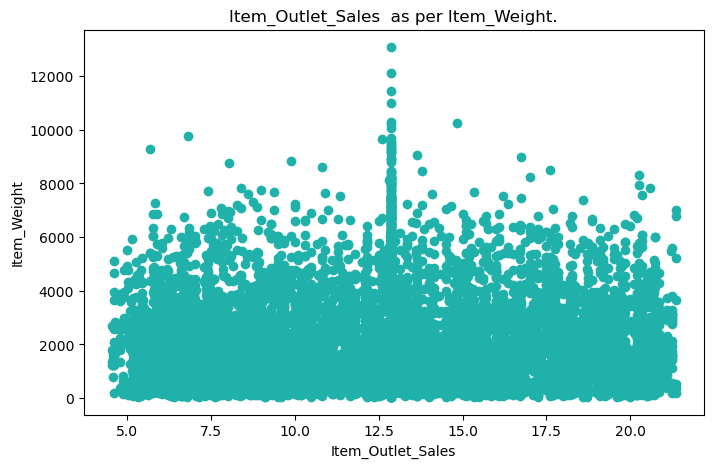

In [22]:
# scatter plot on Numerical to Numerical column -->

plt.figure(figsize=(8,5))
plt.scatter(train_data["Item_Weight"], train_data["Item_Outlet_Sales"] , c='lightseagreen')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Weight')
plt.title('Item_Outlet_Sales  as per Item_Weight.')
plt.show()

**Observation:**
- Item_Weight - The data is very spreaded there is no specific pattern in scatter plot.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

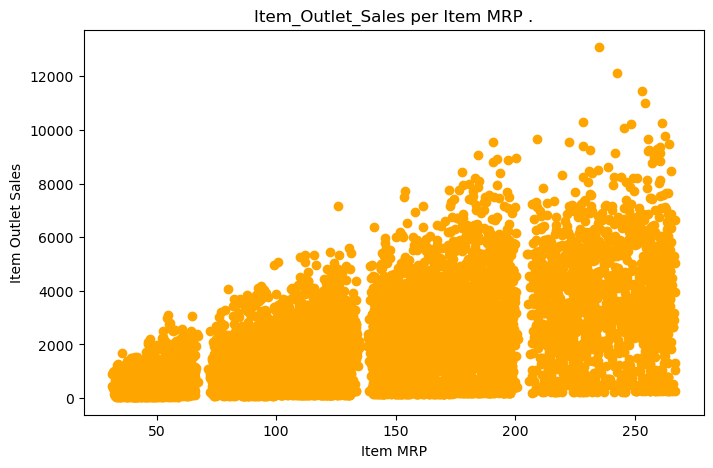

In [23]:
# scatter plot on Numerical to Numerical column -->

plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train_data , c='orange')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Item_Outlet_Sales per Item MRP .')
plt.show()

**Observation:**
- The scatter plot illustrates a positive correlation, suggesting that items with higher Maximum Retail Price (MRP) tend to have higher sales.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

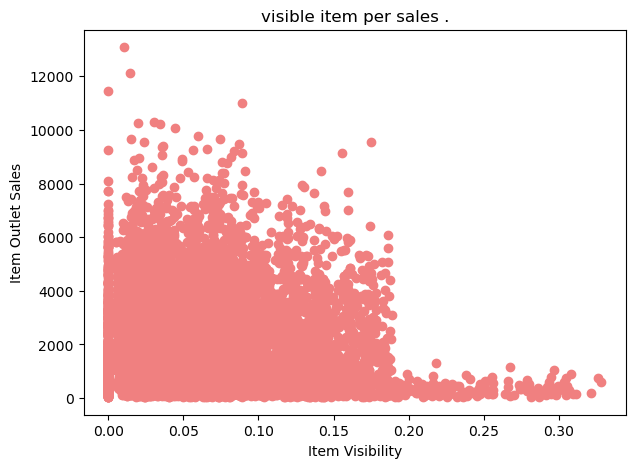

In [24]:
# scatter plot on Numerical to Numerical column -->

plt.figure(figsize=(7,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_Visibility',data=train_data , c='lightcoral')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('visible item per sales .')
plt.show()

**Observation:**
Item visibility is dispersed, but there's a noticeable lack of sales for certain small visibility items.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Numerical-Categorical

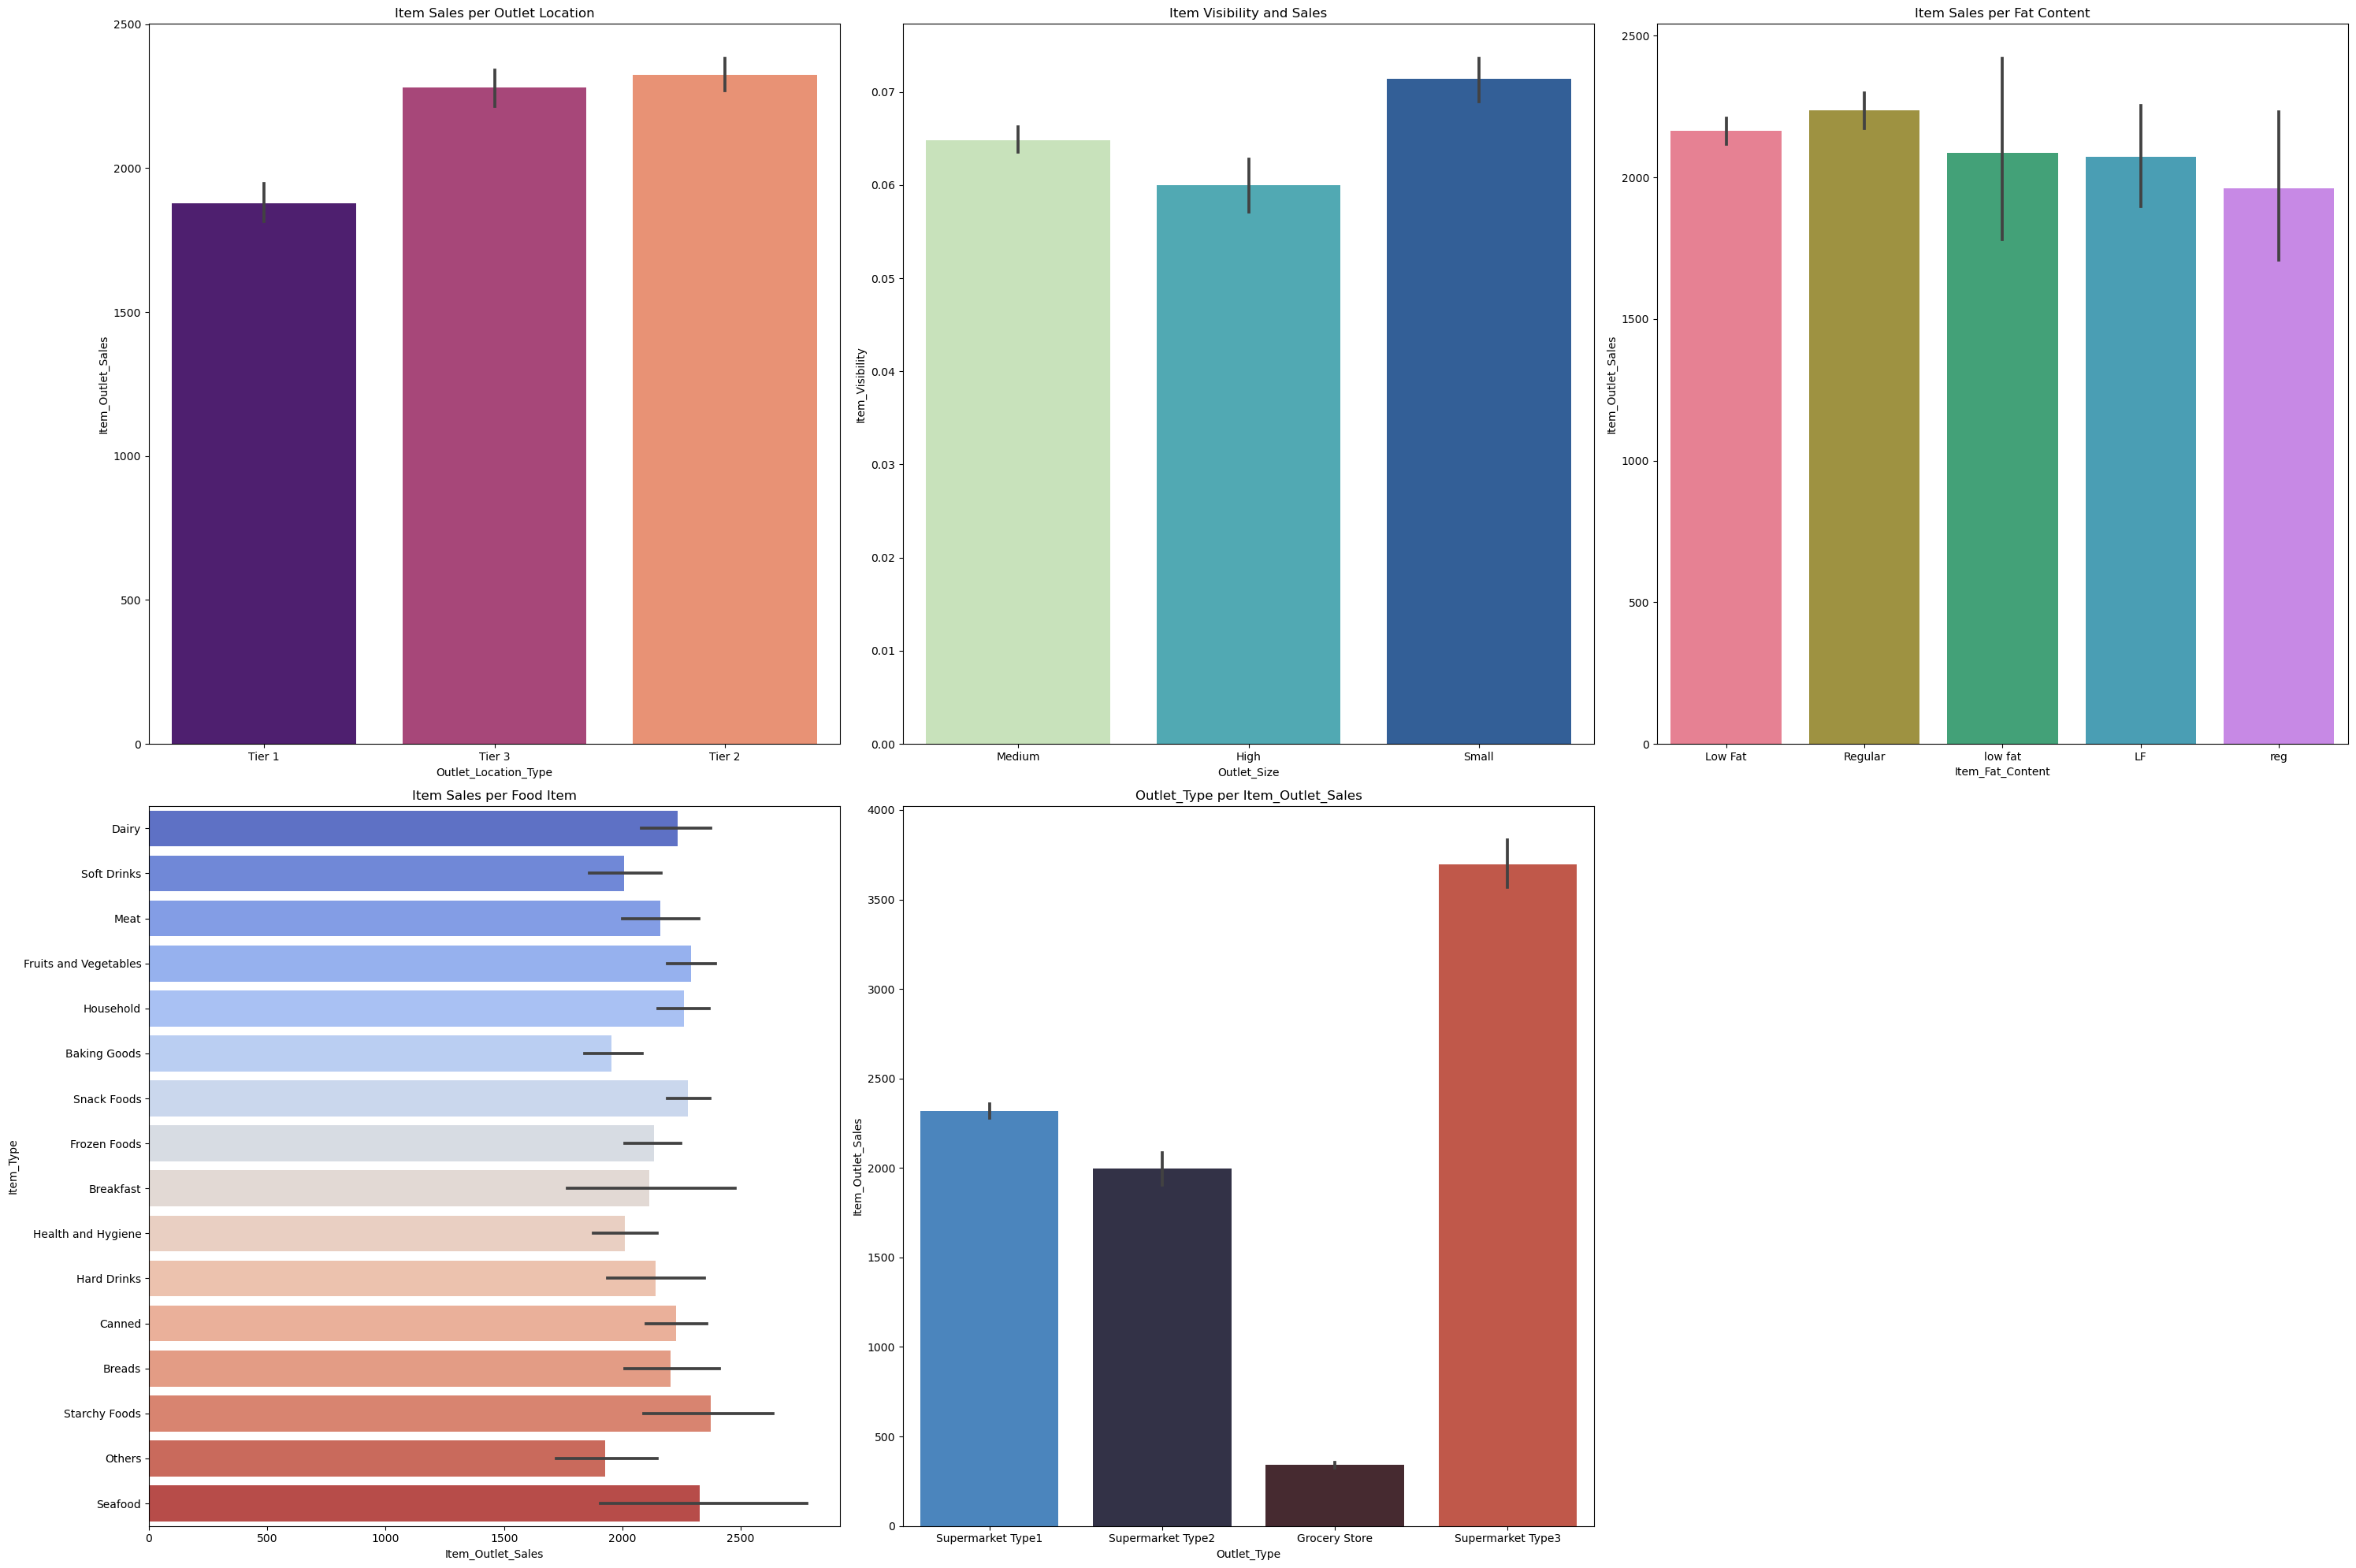

In [25]:
# subplots  -->
fig, axs = plt.subplots(2, 3, figsize=(30, 20))

# Plot 1: Barplot ofOutlet_Location_Type per Item Sales .
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data, palette='magma', ax=axs[0, 0])
axs[0, 0].set_title('Item Sales per Outlet Location')

# Plot 2: Barplot of Item Visibility per Outlet Size
sns.barplot(x='Outlet_Size', y='Item_Visibility', data=train_data, palette='YlGnBu', ax=axs[0, 1])
axs[0, 1].set_title('Item Visibility and Sales')

# Plot 3: Barplot of Item_Outlet_Sales per Item_Outlet_Sales  
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_data, palette='husl', ax=axs[0, 2])
axs[0, 2].set_title('Item Sales per Fat Content')

# Plot 4: Barplot of Item_Outlet_Sales Sales per Item_Type
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=train_data, palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Item Sales per Food Item')

# Plot 5: Barplot of Outlet_Type and Item_Outlet_Sales
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train_data,palette='icefire' , ax=axs[1, 1])
axs[1, 1].set_title('Outlet_Type per Item_Outlet_Sales')

# Remove empty subplot in the second row
fig.delaxes(axs[1, 2])

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()



##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   Multivariate Analysis : -->

<Axes: >

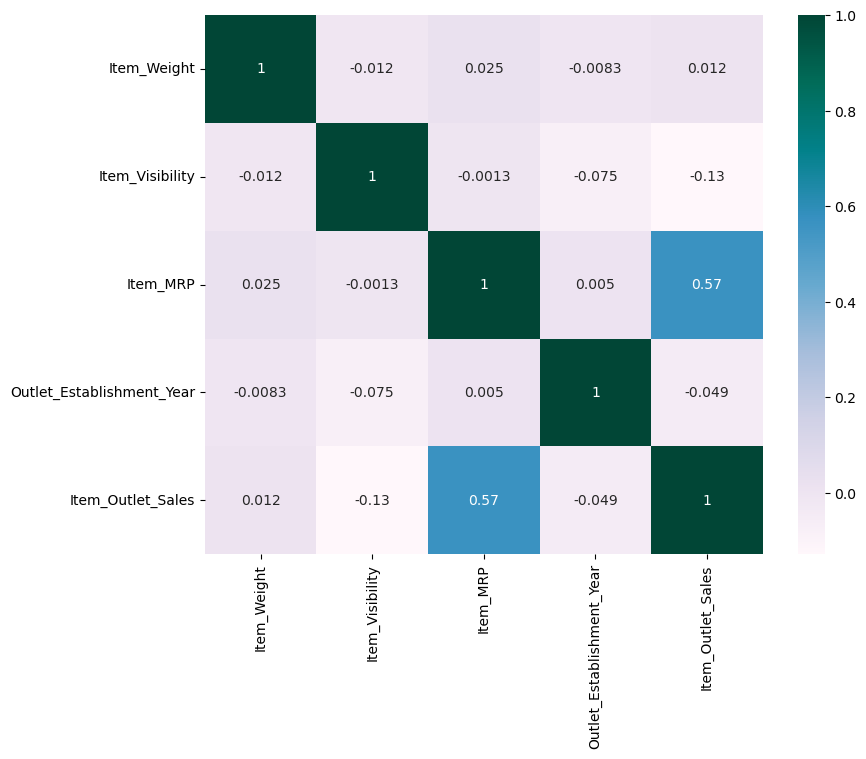

In [26]:
# Heatmap --> for all numerical columns -->

plt.figure(figsize=(9,7))
sns.heatmap(train_data.corr(), annot=True, cmap ='PuBuGn')

**Observation**
- High correlation is observed between `Item_Outlet_Sales` and `Item_MRP`.

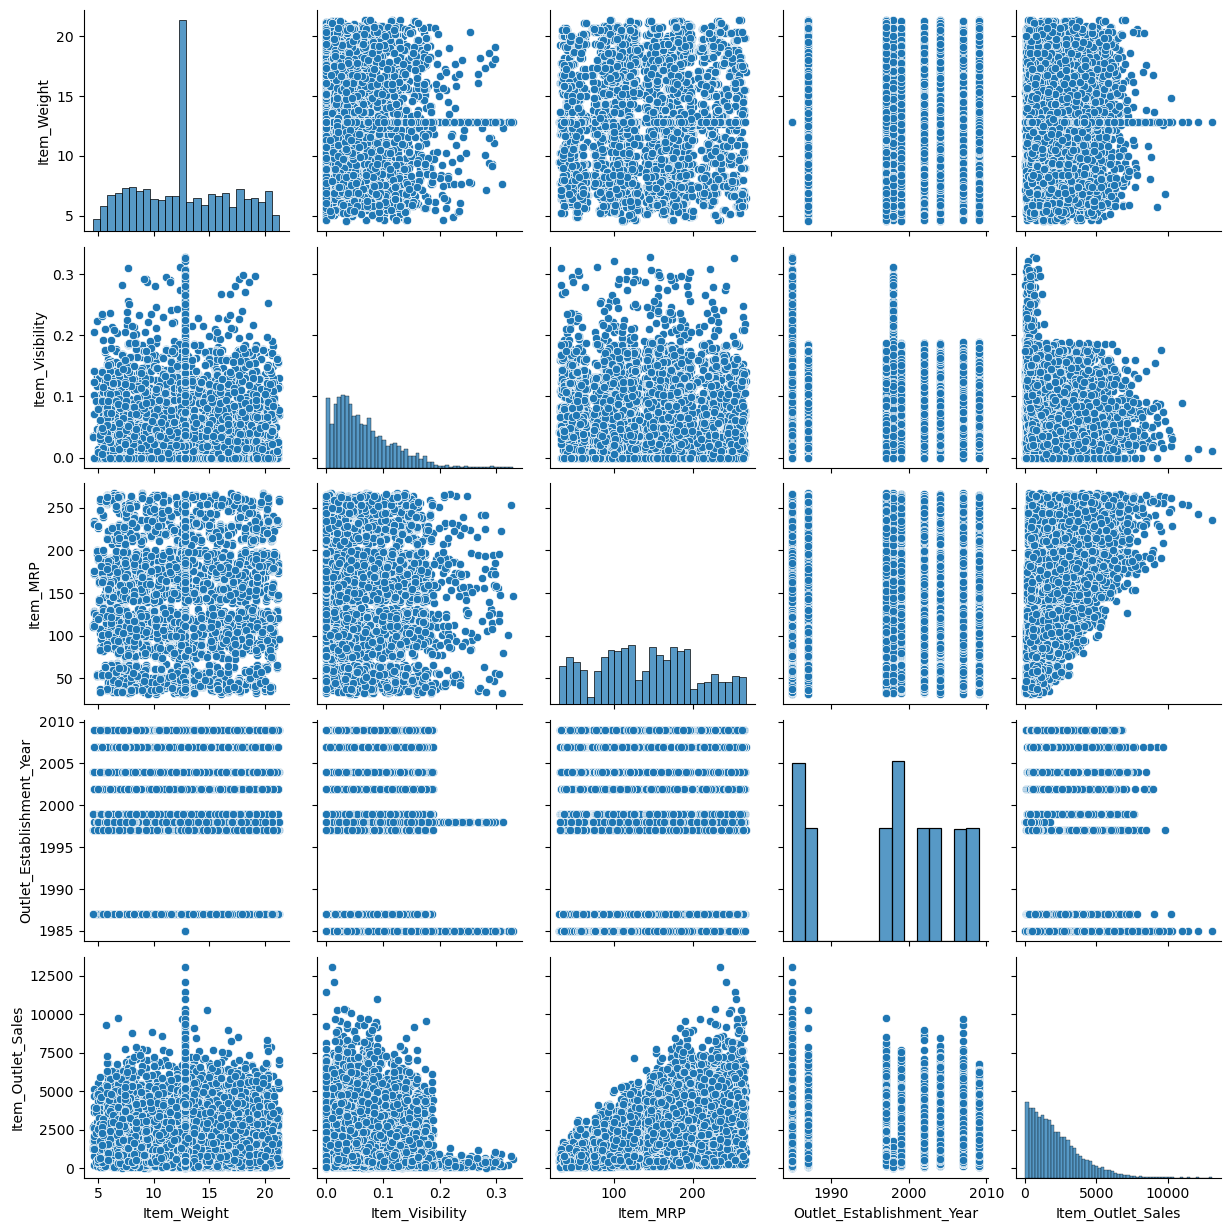

In [27]:
# pairplot --> for each Numerical column -->

sns.pairplot(train_data)

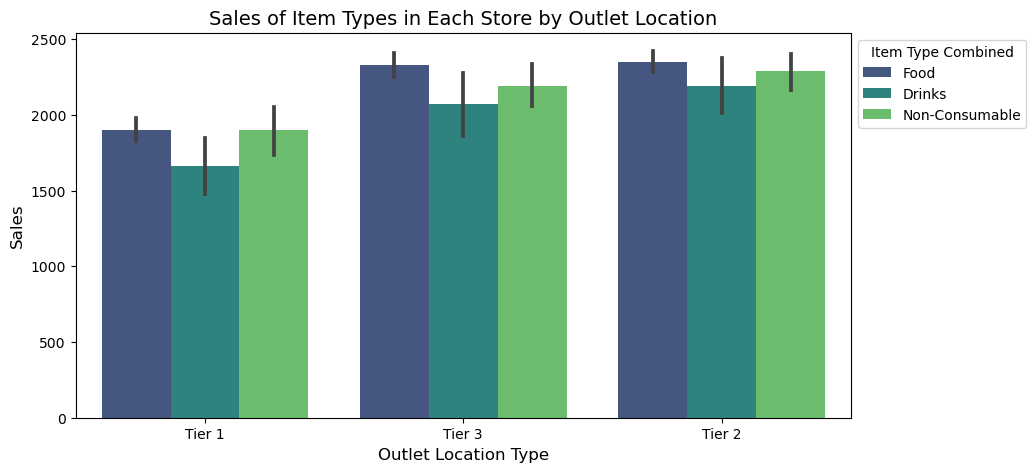

In [28]:
# Create a new column 'Item_Type_Combined' based on 'Item_Identifier'
train_data['Item_Type_Combined'] = train_data['Item_Identifier'].apply(
    lambda x: 'Food' if x.startswith('FD') else ('Drinks' if x.startswith('DR') else 'Non-Consumable'))


plt.figure(figsize=(10, 5))
sns.barplot(data=train_data, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Item_Type_Combined', palette='viridis')

plt.xlabel('Outlet Location Type', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales of Item Types in Each Store by Outlet Location', fontsize=14)
plt.legend(title='Item Type Combined', bbox_to_anchor=(1, 1))

plt.show()


### Observations:

1. **Seafood Dominance:** Seafood emerges as the top-selling item type in Supermarket 1 and 2, with Grocery stores exhibiting comparatively lower sales.

2. **Teir3 Outlet Type Diversity:** Tier 3 locations encompass all Outlet Types, showcasing a versatile retail landscape. 

3. **Supermarket Type 3 Success:** Supermarket Type 3 stands out with the highest sales, indicating its strong performance in the market.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 9).Feature Engineering

In [29]:
def detect_outliers(data, feature):
    Q1  = data[feature].quantile(0.25)
    Q3  = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# Detect outliers and print limits
upper_limit, lower_limit = detect_outliers(train_data, 'Item_Visibility')
print('Upper limit: ', upper_limit)
print('Lower limit: ', lower_limit)

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


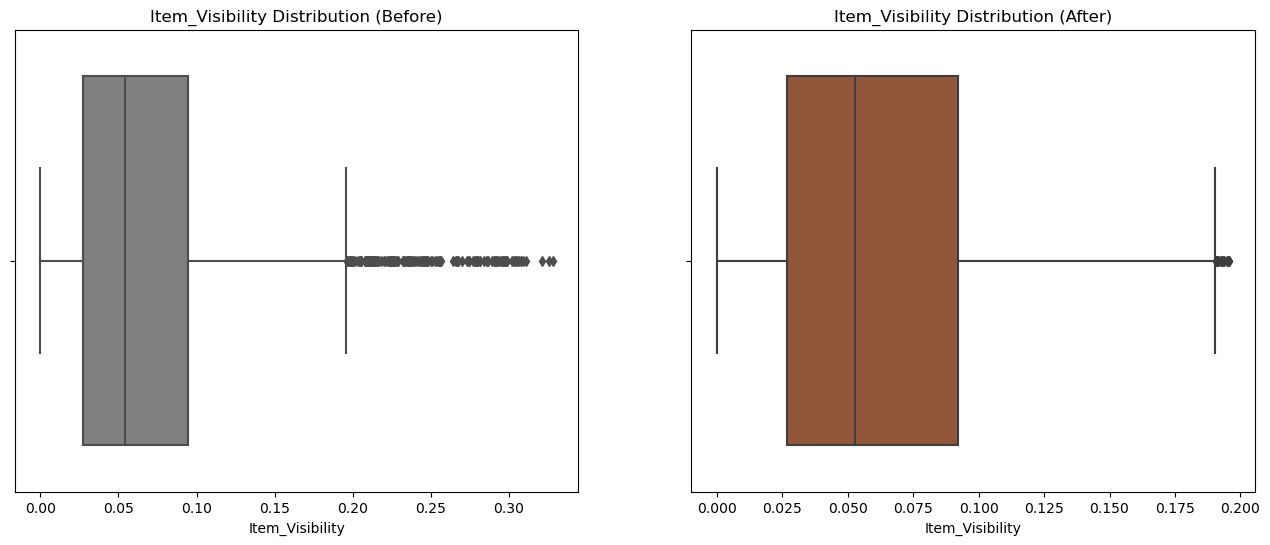

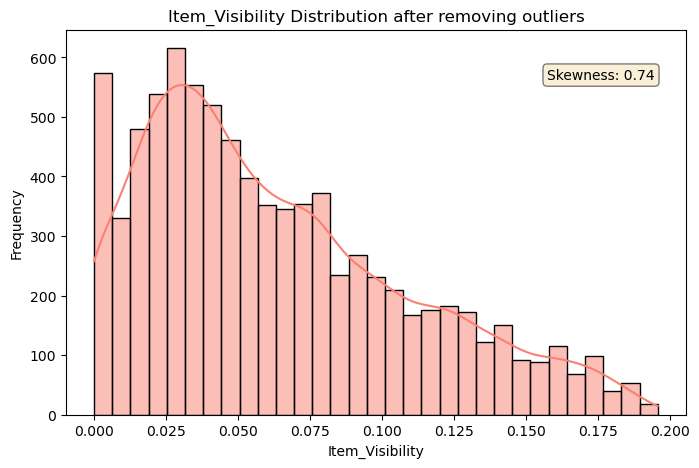

In [30]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.boxplot(x=train_data['Item_Visibility'], ax=ax[0], color='gray')
ax[0].set_title('Item_Visibility Distribution (Before)')


# Remove outliers 
filtered_data = train_data[(train_data['Item_Visibility'] > lower_limit) & (train_data['Item_Visibility'] < upper_limit)]

sns.boxplot(x=filtered_data['Item_Visibility'], ax=ax[1], color='sienna')
ax[1].set_title('Item_Visibility Distribution (After)')

plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['Item_Visibility'], kde=True, color='salmon')

# skewness 
skewness_value = skew(filtered_data['Item_Visibility'])
plt.text(0.95, 0.9, f'Skewness: {skewness_value:.2f}', transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.title('Item_Visibility Distribution after removing outliers')
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')

print('Upper limit: ', upper_limit)
print('Lower limit: ', lower_limit)
plt.show()


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Upper limit:  6501.8699
Lower limit:  -2566.3261


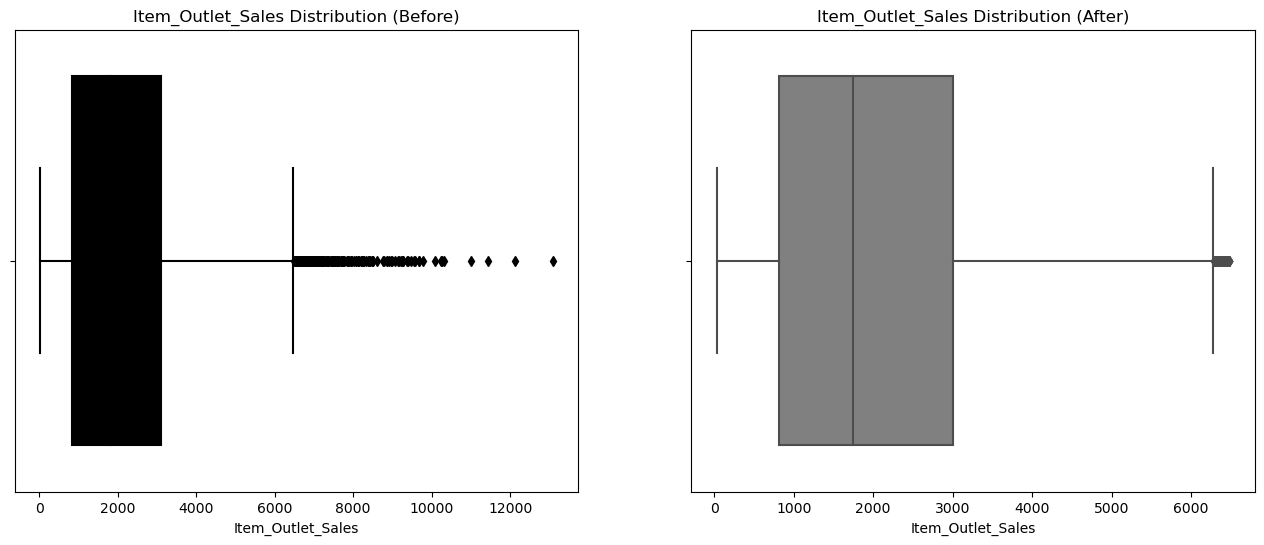

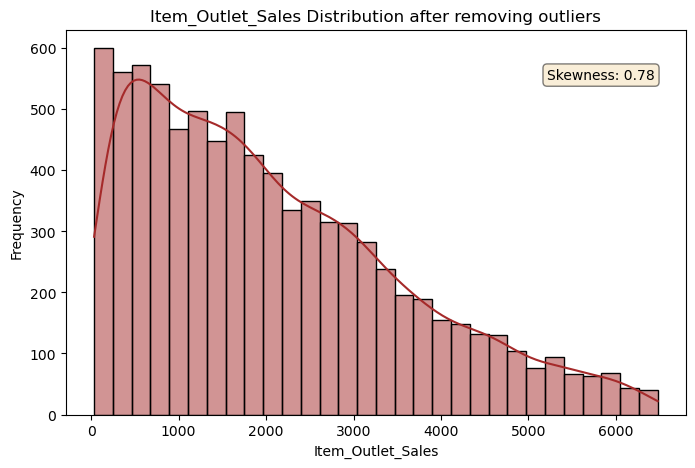

In [31]:
upper_limit_sales, lower_limit_sales = detect_outliers(train_data, 'Item_Outlet_Sales')
print('Upper limit: ', upper_limit_sales)
print('Lower limit: ', lower_limit_sales)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.boxplot(x=train_data['Item_Outlet_Sales'], ax=ax[0], color='black')
ax[0].set_title('Item_Outlet_Sales Distribution (Before)')

# Remove outliers 
filtered_sales_data = train_data[(train_data['Item_Outlet_Sales'] > lower_limit_sales) & (train_data['Item_Outlet_Sales'] < upper_limit_sales)]

sns.boxplot(x=filtered_sales_data['Item_Outlet_Sales'], ax=ax[1], color='gray')
ax[1].set_title('Item_Outlet_Sales Distribution (After)')

plt.figure(figsize=(8, 5))
sns.histplot(filtered_sales_data['Item_Outlet_Sales'], kde=True, color='Brown')

# skewness 
skewness_value_sales = skew(filtered_sales_data['Item_Outlet_Sales'])
plt.text(0.95, 0.9, f'Skewness: {skewness_value_sales:.2f}', transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.title('Item_Outlet_Sales Distribution after removing outliers')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()


In [32]:
# replace same subcaregory in Item_Fat_Content column -->

train_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
fat = {'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}

train_data.loc[: , 'Item_Fat_Content'] = train_data.loc[: , 'Item_Fat_Content'].map(fat)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Text(0.5, 1.0, 'count for Item_Fat_Content.')

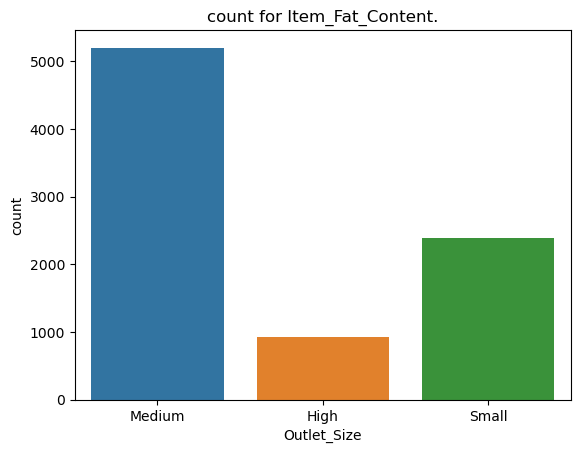

In [34]:
sns.countplot(train_data["Item_Fat_Content"] , x = train_data["Outlet_Size"] )
print(train_data["Item_Fat_Content"].value_counts() )

plt.title('count for Item_Fat_Content.')

- Purchase Preference: Analysis of the plot indicates a higher preference among customers for purchasing Low Fat items compared to Regular Fat items.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [35]:
# selecting required features -->

train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

- We drop 'Item_Identifier' and 'Outlet_Identifier' columns due to their uniqueness."

### 10).Encoding Categorical Variables -->

### 11) Label Encoding -->

In [36]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [37]:
# Numerical columns in train_data  -->
train_data.select_dtypes(include=['float' , 'int']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [38]:
# Categorical columns in train_data  -->
train_data.select_dtypes(include='object').columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
# Categorical columns -->
train_data[train_data.select_dtypes(include='object').columns] = train_data[train_data.select_dtypes(include='object').columns].apply(le.fit_transform)

In [41]:
train_data.select_dtypes(include='object').columns

Index([], dtype='object')

- Convert the all Categorical columns into Numerical columns using Label Encoding 

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
 10  Item_Type_Combined         8523 non-null   int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 532.8 KB


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 13) Pre-Processing Data -->

In [43]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,0
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,1
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800,1
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052,2


In [44]:
train_data.shape

(8523, 11)

In [45]:
x=train_data.drop('Item_Outlet_Sales',axis=1)
y=train_data['Item_Outlet_Sales']

In [46]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,0
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,1
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,1
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,2


In [47]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

In [49]:
xtrain.head(2)
xtrain.shape

(6818, 10)

In [50]:
ytrain.head(2)
ytrain.shape

(6818,)

In [51]:
xtest.shape

(1705, 10)

In [52]:
ytest.shape

(1705,)

In [53]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [54]:
x_train= sc.fit_transform(xtrain)
x_train

array([[-0.01071184, -0.74155088, -1.11809701, ...,  1.10160655,
         2.26500321, -0.19005426],
       [ 1.37284704, -0.74155088, -1.00327853, ..., -0.12584131,
        -0.25277488, -2.12696005],
       [ 0.6979235 ,  1.34852514,  1.07911916, ..., -1.35328917,
        -0.25277488, -0.19005426],
       ...,
       [ 0.14140759,  1.34852514, -1.28783225, ..., -0.12584131,
        -0.25277488, -0.19005426],
       [ 1.37284704, -0.74155088,  0.75331708, ..., -0.12584131,
        -0.25277488, -0.19005426],
       [ 0.25981523, -0.74155088, -0.48306408, ..., -1.35328917,
        -0.25277488, -0.19005426]])

In [55]:
x_test= sc.transform(xtest)
x_test

array([[ 0.37822287, -0.74155088,  0.46277863, ..., -0.12584131,
        -0.25277488,  1.74685153],
       [-0.01071184, -0.74155088, -1.10228753, ...,  1.10160655,
         2.26500321, -0.19005426],
       [-0.33222296, -0.74155088, -0.94257566, ..., -0.12584131,
        -0.25277488,  1.74685153],
       ...,
       [-0.0243631 , -0.74155088,  0.06581076, ...,  1.10160655,
        -0.25277488, -0.19005426],
       [-0.01071184, -0.74155088,  1.88132848, ..., -1.35328917,
        -1.51166392,  1.74685153],
       [-0.01071184,  1.34852514, -0.86237226, ...,  1.10160655,
         2.26500321, -0.19005426]])

In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [57]:
linreg = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def mymodel(model, x_train, ytrain, x_test, ytest):
    model.fit(x_train, ytrain)
    ypred = model.predict(x_test)
    print(f"MAE -: {mean_absolute_error(ytest, ypred)}")
    print(f"MSE -: {mean_squared_error(ytest, ypred)}")
    print(f"RMSE -: {np.sqrt(mean_squared_error(ytest, ypred))}")
    print(f"R-Squared -: {r2_score(ytest, ypred)}")

In [59]:
mymodel(linreg, x_train, ytrain, x_test, ytest)

MAE -: 913.8082081530115
MSE -: 1432197.4769163178
RMSE -: 1196.7445328541585
R-Squared -: 0.5106709085314202


In [60]:
print(f'Test score     = {linreg.score(xtest, ytest)}')

Test score     = -12371.188110299438


In [61]:
mymodel(rf , x_train, ytrain, x_test, ytest)

MAE -: 817.7687172304985
MSE -: 1311844.6105385665
RMSE -: 1145.3578526113865
R-Squared -: 0.5517910471362346


In [62]:
#test score
print(f'Test score     = {rf.score(xtest, ytest)}')

Test score     = -2.426258717724955


In [63]:
mymodel(xgb , x_train, ytrain, x_test, ytest)

MAE -: 865.4846489518335
MSE -: 1495608.977275844
RMSE -: 1222.95093003597
R-Squared -: 0.48900553601142693


In [64]:
#test score
print(f'Test score     = {xgb.score(xtest, ytest)}')

Test score     = -2.9871422085129424


### Hyperparameter Tunning -->

In [65]:
from sklearn.linear_model import Ridge, Lasso

In [66]:
# Ridge
l2 = Ridge(alpha=5)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)
print(r2_score(ytest, ypred))

0.5105992138081594


In [67]:
# Lasso
l1 = Lasso(alpha=4)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)
print(r2_score(ytest, ypred))

0.5085992398790673


In [68]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain, ytrain)
    print(f"{i} -: {l2.score(xtest, ytest)}")

0 -: 0.51067090853142
1 -: 0.5106718781842201
2 -: 0.510662642203032
3 -: 0.510646135761883
4 -: 0.5106244781278289
5 -: 0.5105992138081594
6 -: 0.5105714768916905
7 -: 0.5105421048693871
8 -: 0.5105117186156107
9 -: 0.5104807793286283
10 -: 0.5104496295479195
11 -: 0.5104185230171252
12 -: 0.5103876466361021
13 -: 0.5103571367386028
14 -: 0.5103270912574084
15 -: 0.5102975788803492
16 -: 0.5102686459852626
17 -: 0.5102403219223058
18 -: 0.510212623057453
19 -: 0.5101855558810526
20 -: 0.5101591194063608
21 -: 0.5101333070257756
22 -: 0.5101081079507142
23 -: 0.5100835083303019
24 -: 0.510059492121236
25 -: 0.5100360417641363
26 -: 0.5100131387088997
27 -: 0.5099907638218752
28 -: 0.5099688977003292
29 -: 0.5099475209140187
30 -: 0.5099266141893845
31 -: 0.5099061585485117
32 -: 0.5098861354124351
33 -: 0.5098665266763329
34 -: 0.5098473147625857
35 -: 0.5098284826564308
36 -: 0.5098100139279766
37 -: 0.5097918927435646
38 -: 0.5097741038688591
39 -: 0.5097566326655665
40 -: 0.50973946

##### Cross Validation -->

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cvs = cross_val_score(linreg, x,y, cv=10)
cvs

array([0.51453725, 0.5374745 , 0.50123474, 0.50839013, 0.46016216,
       0.51139436, 0.52810171, 0.48374323, 0.52337363, 0.48427022])

In [71]:
cvs.mean()

0.5052681944803616

##### Random Forest -->

In [72]:
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4, random_state=1)

In [73]:
mymodel(rf ,  x_train, ytrain, x_test, ytest)

MAE -: 778.1848451109278
MSE -: 1200866.6833767598
RMSE -: 1095.8406286393838
R-Squared -: 0.5897081145423839


In [74]:
# XGBoost
xgb = XGBRegressor(n_estimators=200, booster='gblinear',n_jobs=4, random_state=1)

In [75]:
mymodel(xgb , x_train, ytrain, x_test, ytest )

MAE -: 913.808215542991
MSE -: 1432197.5008269718
RMSE -: 1196.7445428440324
R-Squared -: 0.510670900362031


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Project Conclusion: -->

1. **Market Focus:** The analysis points to a robust market for medium-sized supermarkets, particularly in Tier 3 cities. Customers in these areas show a preference for Low Fat items with a sweet spot for products priced between 100 and 180 MRP.

2. **Healthy Choices Preferred:** Fruits and Vegetables emerge as popular choices, highlighting a consumer inclination towards healthier options.

3. **Visibility Impact:** A notable finding reveals a negative correlation between item visibility and sales. Enhancing product visibility within the store could potentially boost sales.

4. **Supermarket Type 3 Success:** Despite being less common, Supermarket Type 3 demonstrates significant success. This suggests promising growth opportunities within this segment.

In summary, the data suggests strategic avenues for supermarkets, emphasizing the importance of tailored product offerings, visibility enhancement, and potential expansion in Tier 3 cities and Supermarket Type 3 models.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Recommendations:

1. **Leverage Supermarket Type 3 Success:** Maintain and enhance the sales strategies of large stores like Supermarket Type 3, given their evident success in generating higher sales.

2. **Strategic Planning for Smaller Stores:** Implement strategic initiatives for smaller stores, including grocery stores, to revitalize and improve sales. This may involve targeted marketing, product assortment adjustments, and enhanced customer engagement.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Save Model

In [76]:
import joblib

In [77]:
joblib.dump(RandomForestRegressor,r'C:\Users\user\OneDrive\Desktop\Technocolabs\RandomForestRegressor.sav')


['C:\\Users\\user\\OneDrive\\Desktop\\Technocolabs\\RandomForestRegressor.sav']

In [78]:
model=joblib.load(r'C:\Users\user\OneDrive\Desktop\Technocolabs\RandomForestRegressor.sav')
model

sklearn.ensemble._forest.RandomForestRegressor

### END Train data Prediction

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# BigMart Sales Prediction  On Test_Dataset .

In [79]:
# Read test dataset -->

test_data = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Technocolabs\test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [80]:
# First five rows of train_dataset -->
test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [81]:
# last five rows of train_dataset -->
test_data.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [82]:
# Shape of train_dataset -->
test_data.shape

(5681, 11)

- There are 5681 rows and 11 columns which is exactly same we had it in excel.

In [83]:
# Lets check how many columns present in train_dataset -->

test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [84]:
# info() about tha train_dataset -->
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [85]:
# describe() -- train_dataset -->

test_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,DRF48,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


- describe() --> This method help to see test_data spread for numerical values by default :- min, max, mean, percentiles , std ...

- The dataset comprises 5681 entries and 11 attributes. Null values are present in 'Item_Weight' and 'Outlet_Size'. 'Item_Identifier' and 'Outlet_Identifier' serve as identifiers and do not impact the prediction of 'Item_Outlet_Sales', the target variable. Categorical features include 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', and 'Outlet_Type'.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 8).Missing Value Treatment

In [86]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Item_Weight     976
Outlet_Size    1606
dtype: int64

- Missing values are present in 'Item_Weight' and 'Outlet_Size' in test_data

In [87]:
test_data.Item_Weight.value_counts()
test_data.Item_Weight.fillna(test_data.Item_Weight.mean() , inplace=True)
test_data.Outlet_Size.value_counts()
test_data.Outlet_Size.fillna('Medium' , inplace=True)

- Fill missing numeric values with column mean, and non-numeric values with most frequent value.

In [88]:
test_data.isnull().sum()[test_data.isnull().sum() >0]

Series([], dtype: int64)